<h4 style="text-align: center;">Professional Certificate in Machine Learning and Artificial Intelligence</h3>
<h2 style="text-align: center;">Predicting Social Share Counts for Online News Articles: A Machine Learning Approach</h2>
<h3 style="text-align: center;">Capstone Project</h3>

### Research Problem
How accurately can we predict the number of times an online news article will be shared before it gets published?  

### Expected Results  
I expect to identify key features that significantly impact the popularity of online news articles and develop a
predictive model that accurately forecasts the number of shares. The results will likely show varying degrees
of accuracy across different models, with ensemble methods like Random Forest and XGBoost expected to
perform better than simpler models.  

### Importance of Predicting Online News Article Popularity

Predicting the popularity of online news articles holds significant value for various stakeholders, and here’s a detailed breakdown of why this is crucial:

#### **1. Media Companies**

- **Content Strategy**: Media organizations can fine-tune their content strategies to align with what resonates with audiences. By understanding the factors that drive shares, they can create more engaging and shareable content.
- **Revenue Generation**: Higher engagement often leads to increased revenue through ads and subscriptions. Tailoring content based on predicted popularity can directly influence the bottom line.

#### **2. Information Dissemination**

- **Public Health**: Accurate prediction models can enhance the dissemination of important health-related information, ensuring that critical announcements reach a broad audience quickly.
- **Educational Content**: Predicting what educational articles will be shared more can help educational institutions and content creators maximize their impact.
- **Emergency Alerts**: In times of crisis or emergencies, understanding what types of information are most likely to be shared can improve the speed and effectiveness of communication.

#### **3. Advertising**

- **Targeted Advertising**: Knowing which articles are likely to go viral allows advertisers to place their ads strategically, improving the relevance and effectiveness of their campaigns.
- **Cost Efficiency**: Effective predictions reduce wasted advertising spend by focusing on content with higher share potential, thus optimizing marketing budgets.

#### **4. Public Opinion**

- **Shaping Discourse**: Media influences public opinion and societal discourse. By predicting which articles are likely to go viral, media companies can better understand and potentially shape public conversations.
- **Engagement**: Articles with high predicted popularity are more likely to spark discussions and influence public opinion, which can be critical for media outlets aiming to steer or reflect societal trends.

#### **Consequences of Not Addressing This Question**

- **Missed Opportunities**: Without predictive insights, media companies may fail to optimize their content for maximum reach and impact, potentially losing out on audience engagement and revenue.
- **Inefficient Strategies**: Lack of data-driven strategies could lead to less effective content creation and advertising, resulting in suboptimal business performance.
- **Reduced Influence**: Media organizations might struggle to effectively influence public opinion or disseminate important information in a timely manner, which can diminish their role and effectiveness.

In conclusion, successfully predicting article popularity can lead to more strategic content creation, better audience engagement, improved advertising efficiency, and a stronger ability to influence public discourse outcomes.

# 1. Data Exploration and Preprocessing

## 1.1. Introduction

### Overview of the dataset

#### Online News Popularity Dataset

#### **Overview**

- **Purpose**: The dataset is designed to predict the number of shares an article will receive on social networks.
- **Size**: Contains 39,644 rows and 61 columns.
- **Source**: UC Irvine Machine Learning Repository, as cited in the paper by Fernandes, Vinagre, and Cortez (2015).

#### **Attributes**

The dataset includes a mix of qualitative and quantitative features. Here's a summary of the key attributes:

1. **Qualitative Attributes (Non-Predictive)**
   - **URL**: The URL of the article (Column 1).
   - **Timedelta**: Days between the article publication and dataset acquisition (Column 2).

2. **Quantitative Attributes**
   - **Textual Features**:
     - **N_Tokens_Title**: Number of words in the title (Column 3).
     - **N_Tokens_Content**: Number of words in the content (Column 4).
     - **N_Unique_Tokens**: Rate of unique words in the content (Column 5).
     - **N_Non_Stop_Words**: Rate of non-stop words in the content (Column 6).
     - **N_Non_Stop_Unique_Tokens**: Rate of unique non-stop words in the content (Column 7).
     - **Average_Token_Length**: Average length of words in the content (Column 12).
   
   - **Content Features**:
     - **Num_Hrefs**: Number of links (Column 8).
     - **Num_Self_Hrefs**: Number of links to other Mashable articles (Column 9).
     - **Num_Imgs**: Number of images (Column 10).
     - **Num_Videos**: Number of videos (Column 11).
     - **Num_Keywords**: Number of keywords in the metadata (Column 13).

   - **Channel and Date Features**:
     - **Data_Channel_Is_* **: Binary indicators for different data channels (Columns 14-19).
     - **Weekday_Is_* **: Binary indicators for the day of the week the article was published (Columns 32-39).
     - **Is_Weekend**: Binary indicator if the article was published on a weekend (Column 39).

   - **Keyword and Reference Features**:
     - **Kw_Min_Min, Kw_Max_Min, Kw_Avg_Min**: Metrics related to the worst-performing keywords (Columns 20-22).
     - **Kw_Min_Max, Kw_Max_Max, Kw_Avg_Max**: Metrics related to the best-performing keywords (Columns 23-25).
     - **Self_Reference_Min_Shares, Self_Reference_Max_Shares, Self_Reference_Avg_Shares**: Metrics related to shares of referenced articles (Columns 29-31).

   - **LDA Topic Distribution**:
     - **Lda_00 to Lda_04**: Closeness to LDA (Latent Dirichlet Allocation) topics (Columns 40-44).

   - **Sentiment and Subjectivity**:
     - **Global_Subjectivity**: Subjectivity of the content (Column 45).
     - **Global_Sentiment_Polarity**: Sentiment polarity of the content (Column 46).
     - **Global_Rate_Positive_Words, Global_Rate_Negative_Words**: Rates of positive and negative words in the content (Columns 47-48).
     - **Rate_Positive_Words, Rate_Negative_Words**: Rates of positive and negative words among non-neutral tokens (Columns 49-50).
     - **Avg_Positive_Polarity, Min_Positive_Polarity, Max_Positive_Polarity**: Metrics related to positive word polarity (Columns 51-53).
     - **Avg_Negative_Polarity, Min_Negative_Polarity, Max_Negative_Polarity**: Metrics related to negative word polarity (Columns 54-56).
     - **Title_Subjectivity, Title_Sentiment_Polarity**: Subjectivity and sentiment polarity of the title (Columns 57-58).
     - **Abs_Title_Subjectivity, Abs_Title_Sentiment_Polarity**: Absolute measures of title subjectivity and sentiment polarity (Columns 59-60).

   - **Target Variable**:
     - **Shares**: Number of shares on social networks (Column 61).

#### **Missing Data**

- All columns have 0% null ratios, owing for the exploration of feature importance and selection techniques.

#### Data Dictionary  

| Column Position | Atrribute Name                | Definition                                                                                   | Data Type    | Example                                                        | % Null Ratios |
| --------------- | ----------------------------- | -------------------------------------------------------------------------------------------- | ------------ | -------------------------------------------------------------- | ------------- |
| 1               | URL                           | URL Of The Article (Non-Predictive)                                                          | Qualitative  | "http://mashable.com/2013/01/07/amazon-instant-video-browser/" | 0             |
| 2               | Timedelta                     | Timedelta: Days Between The Article Publication And The Dataset Acquisition (Non-Predictive) | Quantitative | 731                                                            | 0             |
| 3               | N_Tokens_Title                | N_Tokens_Title: Number Of Words In The Title                                                 | Quantitative | 12                                                             | 0             |
| 4               | N_Tokens_Content              | N_Tokens_Content: Number Of Words In The Content                                             | Quantitative | 219                                                            | 0             |
| 5               | N_Unique_Tokens               | N_Unique_Tokens: Rate Of Unique Words In The Content                                         | Quantitative | 0.663594467                                                    | 0             |
| 6               | N_Non_Stop_Words              | N_Non_Stop_Words: Rate Of Non-Stop Words In The Content                                      | Quantitative | 0.999999992                                                    | 0             |
| 7               | N_Non_Stop_Unique_Tokens      | N_Non_Stop_Unique_Tokens: Rate Of Unique Non-Stop Words In The Content                       | Quantitative | 0.815384609                                                    | 0             |
| 8               | Num_Hrefs                     | Num_Hrefs: Number Of Links                                                                   | Quantitative | 4                                                              | 0             |
| 9               | Num_Self_Hrefs                | Num_Self_Hrefs: Number Of Links To Other Articles Published By Mashable                      | Quantitative | 2                                                              | 0             |
| 10              | Num_Imgs                      | Num_Imgs: Number Of Images                                                                   | Quantitative | 1                                                              | 0             |
| 11              | Num_Videos                    | Num_Videos: Number Of Videos                                                                 | Quantitative | 0                                                              | 0             |
| 12              | Average_Token_Length          | Average_Token_Length: Average Length Of The Words In The Content                             | Quantitative | 4.680365297                                                    | 0             |
| 13              | Num_Keywords                  | Num_Keywords: Number Of Keywords In The Metadata                                             | Quantitative | 5                                                              | 0             |
| 14              | Data_Channel_Is_Lifestyle     | Data_Channel_Is_Lifestyle: Is Data Channel 'Lifestyle'?                                      | Quantitative | 0                                                              | 0             |
| 15              | Data_Channel_Is_Entertainment | Data_Channel_Is_Entertainment: Is Data Channel 'Entertainment'?                              | Quantitative | 1                                                              | 0             |
| 16              | Data_Channel_Is_Bus           | Data_Channel_Is_Bus: Is Data Channel 'Business'?                                             | Quantitative | 0                                                              | 0             |
| 17              | Data_Channel_Is_Socmed        | Data_Channel_Is_Socmed: Is Data Channel 'Social Media'?                                      | Quantitative | 0                                                              | 0             |
| 18              | Data_Channel_Is_Tech          | Data_Channel_Is_Tech: Is Data Channel 'Tech'?                                                | Quantitative | 0                                                              | 0             |
| 19              | Data_Channel_Is_World         | Data_Channel_Is_World: Is Data Channel 'World'?                                              | Quantitative | 0                                                              | 0             |
| 20              | Kw_Min_Min                    | Kw_Min_Min: Worst Keyword (Min. Shares)                                                      | Quantitative | 0                                                              | 0             |
| 21              | Kw_Max_Min                    | Kw_Max_Min: Worst Keyword (Max. Shares)                                                      | Quantitative | 0                                                              | 0             |
| 22              | Kw_Avg_Min                    | Kw_Avg_Min: Worst Keyword (Avg. Shares)                                                      | Quantitative | 0                                                              | 0             |
| 23              | Kw_Min_Max                    | Kw_Min_Max: Best Keyword (Min. Shares)                                                       | Quantitative | 0                                                              | 0             |
| 24              | Kw_Max_Max                    | Kw_Max_Max: Best Keyword (Max. Shares)                                                       | Quantitative | 0                                                              | 0             |
| 25              | Kw_Avg_Max                    | Kw_Avg_Max: Best Keyword (Avg. Shares)                                                       | Quantitative | 0                                                              | 0             |
| 26              | Kw_Min_Avg                    | Kw_Min_Avg: Avg. Keyword (Min. Shares)                                                       | Quantitative | 0                                                              | 0             |
| 27              | Kw_Max_Avg                    | Kw_Max_Avg: Avg. Keyword (Max. Shares)                                                       | Quantitative | 0                                                              | 0             |
| 28              | Kw_Avg_Avg                    | Kw_Avg_Avg: Avg. Keyword (Avg. Shares)                                                       | Quantitative | 0                                                              | 0             |
| 29              | Self_Reference_Min_Shares     | Self_Reference_Min_Shares: Min. Shares Of Referenced Articles In Mashable                    | Quantitative | 496                                                            | 0             |
| 30              | Self_Reference_Max_Shares     | Self_Reference_Max_Shares: Max. Shares Of Referenced Articles In Mashable                    | Quantitative | 496                                                            | 0             |
| 31              | Self_Reference_Avg_Sharess    | Self_Reference_Avg_Sharess: Avg. Shares Of Referenced Articles In Mashable                   | Quantitative | 496                                                            | 0             |
| 32              | Weekday_Is_Monday             | Weekday_Is_Monday: Was The Article Published On A Monday?                                    | Quantitative | 1                                                              | 0             |
| 33              | Weekday_Is_Tuesday            | Weekday_Is_Tuesday: Was The Article Published On A Tuesday?                                  | Quantitative | 0                                                              | 0             |
| 34              | Weekday_Is_Wednesday          | Weekday_Is_Wednesday: Was The Article Published On A Wednesday?                              | Quantitative | 0                                                              | 0             |
| 35              | Weekday_Is_Thursday           | Weekday_Is_Thursday: Was The Article Published On A Thursday?                                | Quantitative | 0                                                              | 0             |
| 36              | Weekday_Is_Friday             | Weekday_Is_Friday: Was The Article Published On A Friday?                                    | Quantitative | 0                                                              | 0             |
| 37              | Weekday_Is_Saturday           | Weekday_Is_Saturday: Was The Article Published On A Saturday?                                | Quantitative | 0                                                              | 0             |
| 38              | Weekday_Is_Sunday             | Weekday_Is_Sunday: Was The Article Published On A Sunday?                                    | Quantitative | 0                                                              | 0             |
| 39              | Is_Weekend                    | Is_Weekend: Was The Article Published On The Weekend?                                        | Quantitative | 0                                                              | 0             |
| 40              | Lda_00                        | Lda_00: Closeness To Lda Topic 0                                                             | Quantitative | 0.500331204                                                    | 0             |
| 41              | Lda_01                        | Lda_01: Closeness To Lda Topic 1                                                             | Quantitative | 0.37827893                                                     | 0             |
| 42              | Lda_02                        | Lda_02: Closeness To Lda Topic 2                                                             | Quantitative | 0.040004675                                                    | 0             |
| 43              | Lda_03                        | Lda_03: Closeness To Lda Topic 3                                                             | Quantitative | 0.041262648                                                    | 0             |
| 44              | Lda_04                        | Lda_04: Closeness To Lda Topic 4                                                             | Quantitative | 0.040122544                                                    | 0             |
| 45              | Global_Subjectivity           | Global_Subjectivity: Text Subjectivity                                                       | Quantitative | 0.521617145                                                    | 0             |
| 46              | Global_Sentiment_Polarity     | Global_Sentiment_Polarity: Text Sentiment Polarity                                           | Quantitative | 0.092561983                                                    | 0             |
| 47              | Global_Rate_Positive_Words    | Global_Rate_Positive_Words: Rate Of Positive Words In The Content                            | Quantitative | 0.0456621                                                      | 0             |
| 48              | Global_Rate_Negative_Words    | Global_Rate_Negative_Words: Rate Of Negative Words In The Content                            | Quantitative | 0.01369863                                                     | 0             |
| 49              | Rate_Positive_Words           | Rate_Positive_Words: Rate Of Positive Words Among Non-Neutral Tokens                         | Quantitative | 0.769230769                                                    | 0             |
| 50              | Rate_Negative_Words           | Rate_Negative_Words: Rate Of Negative Words Among Non-Neutral Tokens                         | Quantitative | 0.230769231                                                    | 0             |
| 51              | Avg_Positive_Polarity         | Avg_Positive_Polarity: Avg. Polarity Of Positive Words                                       | Quantitative | 0.378636364                                                    | 0             |
| 52              | Min_Positive_Polarity         | Min_Positive_Polarity: Min. Polarity Of Positive Words                                       | Quantitative | 0.1                                                            | 0             |
| 53              | Max_Positive_Polarity         | Max_Positive_Polarity: Max. Polarity Of Positive Words                                       | Quantitative | 0.7                                                            | 0             |
| 54              | Avg_Negative_Polarity         | Avg_Negative_Polarity: Avg. Polarity Of Negative Words                                       | Quantitative | \-0.35                                                         | 0             |
| 55              | Min_Negative_Polarity         | Min_Negative_Polarity: Min. Polarity Of Negative Words                                       | Quantitative | \-0.6                                                          | 0             |
| 56              | Max_Negative_Polarity         | Max_Negative_Polarity: Max. Polarity Of Negative Words                                       | Quantitative | \-0.2                                                          | 0             |
| 57              | Title_Subjectivity            | Title_Subjectivity: Title Subjectivity                                                       | Quantitative | 0.5                                                            | 0             |
| 58              | Title_Sentiment_Polarity      | Title_Sentiment_Polarity: Title Polarity                                                     | Quantitative | \-0.1875                                                       | 0             |
| 59              | Abs_Title_Subjectivity        | Abs_Title_Subjectivity: Absolute Subjectivity Level                                          | Quantitative | 0                                                              | 0             |
| 60              | Abs_Title_Sentiment_Polarity  | Abs_Title_Sentiment_Polarity: Absolute Polarity Level                                        | Quantitative | 0.1875                                                         | 0             |
| 61              | Shares                        | Shares: Number Of Shares                                                                     | Quantitative | 593                                                            | 0             |

#### Acknowledgement

This data set has been sourced from the Machine Learning Repository of University of California, Irvine [Online News Popularity Data Set (UC Irvine)](https://archive.ics.uci.edu/ml/datasets/Online+News+Popularity). 

### Initial data exploration

In [1]:
# Importing Python Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
#to ignore warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Reading the dataset
data = pd.read_csv("OnlineNewsPopularity.csv")

In [3]:
# Display the first few rows of the dataset
data.head()

url   timedelta  \
0  http://mashable.com/2013/01/07/amazon-instant-...       731.0   
1  http://mashable.com/2013/01/07/ap-samsung-spon...       731.0   
2  http://mashable.com/2013/01/07/apple-40-billio...       731.0   
3  http://mashable.com/2013/01/07/astronaut-notre...       731.0   
4   http://mashable.com/2013/01/07/att-u-verse-apps/       731.0   

    n_tokens_title   n_tokens_content   n_unique_tokens   n_non_stop_words  \
0             12.0              219.0          0.663594                1.0   
1              9.0              255.0          0.604743                1.0   
2              9.0              211.0          0.575130                1.0   
3              9.0              531.0          0.503788                1.0   
4             13.0             1072.0          0.415646                1.0   

    n_non_stop_unique_tokens   num_hrefs   num_self_hrefs   num_imgs  ...  \
0                   0.815385         4.0              2.0        1.0  ...   
1                   0.791946         3.0              1.0        1.0  ...   
2                   0.663866         3.0              1.0        1.0  ...   
3                   0.665635         9.0              0.0        1.0  ...   
4                   0.540890        19.0             19.0       20.0  ...   

    min_positive_polarity   max_positive_polarity   avg_negative_polarity  \
0                0.100000                     0.7               -0.350000   
1                0.033333                     0.7               -0.118750   
2                0.100000                     1.0               -0.466667   
3                0.136364                     0.8               -0.369697   
4                0.033333                     1.0               -0.220192   

    min_negative_polarity   max_negative_polarity   title_subjectivity  \
0                  -0.600               -0.200000             0.500000   
1                  -0.125               -0.100000             0.000000   
2                  -0.800               -0.133333             0.000000   
3                  -0.600               -0.166667             0.000000   
4                  -0.500               -0.050000             0.454545   

    title_sentiment_polarity   abs_title_subjectivity  \
0                  -0.187500                 0.000000   
1                   0.000000                 0.500000   
2                   0.000000                 0.500000   
3                   0.000000                 0.500000   
4                   0.136364                 0.045455   

    abs_title_sentiment_polarity   shares  
0                       0.187500      593  
1                       0.000000      711  
2                       0.000000     1500  
3                       0.000000     1200  
4                       0.136364      505  

[5 rows x 61 columns]

In [4]:
# Display the dimensions of the dataset
data.shape

(39644, 61)

In [5]:
# Display a concise summary of the DataFrame
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39644 entries, 0 to 39643
Data columns (total 61 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   url                             39644 non-null  object 
 1    timedelta                      39644 non-null  float64
 2    n_tokens_title                 39644 non-null  float64
 3    n_tokens_content               39644 non-null  float64
 4    n_unique_tokens                39644 non-null  float64
 5    n_non_stop_words               39644 non-null  float64
 6    n_non_stop_unique_tokens       39644 non-null  float64
 7    num_hrefs                      39644 non-null  float64
 8    num_self_hrefs                 39644 non-null  float64
 9    num_imgs                       39644 non-null  float64
 10   num_videos                     39644 non-null  float64
 11   average_token_length           39644 non-null  float64
 12   num_keywords                   

### Data Cleaning

In [7]:
# Check for missing values
# Adjust pandas settings to display all rows
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

null_values = data.isnull().sum()
print(null_values)

# Optionally, reset pandas settings to default afterward
pd.reset_option('display.max_rows')
pd.reset_option('display.max_columns')

url                               0
 timedelta                        0
 n_tokens_title                   0
 n_tokens_content                 0
 n_unique_tokens                  0
 n_non_stop_words                 0
 n_non_stop_unique_tokens         0
 num_hrefs                        0
 num_self_hrefs                   0
 num_imgs                         0
 num_videos                       0
 average_token_length             0
 num_keywords                     0
 data_channel_is_lifestyle        0
 data_channel_is_entertainment    0
 data_channel_is_bus              0
 data_channel_is_socmed           0
 data_channel_is_tech             0
 data_channel_is_world            0
 kw_min_min                       0
 kw_max_min                       0
 kw_avg_min                       0
 kw_min_max                       0
 kw_max_max                       0
 kw_avg_max                       0
 kw_min_avg                       0
 kw_max_avg                       0
 kw_avg_avg                 

In [8]:
# Check for duplicates
# Adjust pandas settings to display all rows
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

nunique_values = data.nunique().sort_values(ascending=False)
print(nunique_values)

# Optionally, reset pandas settings to default afterward
pd.reset_option('display.max_rows')
pd.reset_option('display.max_columns')

url                               39644
 LDA_02                           39525
 LDA_04                           39370
 LDA_00                           39337
 kw_avg_avg                       39300
 LDA_01                           39098
 LDA_03                           38963
 global_sentiment_polarity        34695
 global_subjectivity              34501
 kw_avg_max                       30834
 average_token_length             30136
 avg_positive_polarity            27301
 n_unique_tokens                  27281
 n_non_stop_unique_tokens         22930
 kw_max_avg                       19438
 kw_avg_min                       17003
 kw_min_avg                       15982
 avg_negative_polarity            13841
 global_rate_positive_words       13159
 global_rate_negative_words       10271
 self_reference_avg_sharess        8626
 n_tokens_content                  2406
 rate_negative_words               2284
 rate_positive_words               2284
 shares                            1454


In [9]:
# Descriptive Statistics
print("\nDescriptive Statistics for Quantitative Variables:")
data.describe()


Descriptive Statistics for Quantitative Variables:


timedelta  n_tokens_title  n_tokens_content  n_unique_tokens  \
count  39644.000000    39644.000000      39644.000000     39644.000000   
mean     354.530471       10.398749        546.514731         0.548216   
std      214.163767        2.114037        471.107508         3.520708   
min        8.000000        2.000000          0.000000         0.000000   
25%      164.000000        9.000000        246.000000         0.470870   
50%      339.000000       10.000000        409.000000         0.539226   
75%      542.000000       12.000000        716.000000         0.608696   
max      731.000000       23.000000       8474.000000       701.000000   

       n_non_stop_words  n_non_stop_unique_tokens     num_hrefs  \
count      39644.000000              39644.000000  39644.000000   
mean           0.996469                  0.689175     10.883690   
std            5.231231                  3.264816     11.332017   
min            0.000000                  0.000000      0.000000   
25%            1.000000                  0.625739      4.000000   
50%            1.000000                  0.690476      8.000000   
75%            1.000000                  0.754630     14.000000   
max         1042.000000                650.000000    304.000000   

       num_self_hrefs      num_imgs    num_videos  ...  min_positive_polarity  \
count    39644.000000  39644.000000  39644.000000  ...           39644.000000   
mean         3.293638      4.544143      1.249874  ...               0.095446   
std          3.855141      8.309434      4.107855  ...               0.071315   
min          0.000000      0.000000      0.000000  ...               0.000000   
25%          1.000000      1.000000      0.000000  ...               0.050000   
50%          3.000000      1.000000      0.000000  ...               0.100000   
75%          4.000000      4.000000      1.000000  ...               0.100000   
max        116.000000    128.000000     91.000000  ...               1.000000   

       max_positive_polarity  avg_negative_polarity  min_negative_polarity  \
count           39644.000000           39644.000000           39644.000000   
mean                0.756728              -0.259524              -0.521944   
std                 0.247786               0.127726               0.290290   
min                 0.000000              -1.000000              -1.000000   
25%                 0.600000              -0.328383              -0.700000   
50%                 0.800000              -0.253333              -0.500000   
75%                 1.000000              -0.186905              -0.300000   
max                 1.000000               0.000000               0.000000   

       max_negative_polarity  title_subjectivity  title_sentiment_polarity  \
count           39644.000000        39644.000000              39644.000000   
mean               -0.107500            0.282353                  0.071425   
std                 0.095373            0.324247                  0.265450   
min                -1.000000            0.000000                 -1.000000   
25%                -0.125000            0.000000                  0.000000   
50%                -0.100000            0.150000                  0.000000   
75%                -0.050000            0.500000                  0.150000   
max                 0.000000            1.000000                  1.000000   

       abs_title_subjectivity  abs_title_sentiment_polarity         shares  
count            39644.000000                  39644.000000   39644.000000  
mean                 0.341843                      0.156064    3395.380184  
std                  0.188791                      0.226294   11626.950749  
min                  0.000000                      0.000000       1.000000  
25%                  0.166667                      0.000000     946.000000  
50%                  0.500000                      0.000000    1400.000000  
75%                  0.500000                      0.250000    2

Insights derived from the descriptive statistics for the quantitative variables in the dataset:

#### 1. **Shares**
- The number of shares (dependent variable) varies significantly, with a mean of **3,395** shares but a high standard deviation of **11,627**. This suggests considerable variability in the number of shares, which may be influenced by various factors.
- The minimum number of shares is **1**, while the maximum is **843,300**, indicating that some articles go viral while others have almost no engagement.
- The median number of shares (50th percentile) is **1,400**, and the 75th percentile is **2,800**, suggesting that 25% of the articles have shares above this number, representing high-performing content.#

### 2. **Article Length**
- The average number of tokens in the content (`n_tokens_content`) is **546.5**, with a large range from **0** (possibly indicating empty or very short articles) to **8,474** tokens. The median is **409**, indicating that half of the articles have fewer than 409 tokens, and there are some extremely long articles.
- Title length (`n_tokens_title`) has an average of **10.4** tokens, with a small standard deviation of **2.1**. Most titles are between **9** and **12** tokens, showing consistency in title len#gth.

### 3. **Uniqueness of Content**
- The average proportion of unique tokens (`n_unique_tokens`) in the articles is **0.55**, indicating that around 55% of the words in a typical article are unique. However, this metric varies widely, with some articles having a very high uniqueness (e.g., **701 unique tokens**) and others much lower.
- The proportion of non-stop words (`n_non_stop_words`) is close to **1**, suggesting that almost all tokens in most articles are non-stop words, which implies that the articles are generally rich in meaningful #content.

### 4. **Media Elements (Links, Images, Videos)**
- The average article contains around **10.9** hyperlinks (`num_hrefs`), with the number ranging from **0** to **304**. The median is **8**, suggesting that most articles contain several links, but a few outliers have an excessive number of hyperlinks.
- Articles also include images (`num_imgs`) and videos (`num_videos`), with an average of around **4.5** images and **1.25** videos per article. While some articles have no media, others are media-rich, with as many as **128 images** and **91 videos**.
- The high variance in the number of hyperlinks, images, and videos suggests a diversity in article styles, ranging from simple text-based articles to media-h#eavy content.

### 5. **Sentiment and Subjectivity**
- The average `title_subjectivity` score is **0.28**, indicating that titles tend to be more objective than subjective, though there are examples of highly subjective content.
- The average `title_sentiment_polarity` is slightly positive at **0.07**, but the range goes from **-1** to **1**, reflecting that some titles are highly positive, negative, or neutral.
- The polarity of the content also varies. For example, the `avg_negative_polarity` has a mean of **-0.26**, indicating a slightly negative tone in general. However, extreme values suggest that some articles are highly polarized (both posit#ive and negative).

### 6. **Polarity and Subjectivity Extremes**
- For `min_positive_polarity` and `min_negative_polarity`, the data shows extreme values (ranging from **-1** to **1**) that indicate articles with strongly opinionated or neutral content.
- Articles vary significantly in how subjective or polarized their titles and content are, as seen in the wide range of scores for `title_subjectivity` and `abs_titl#e_sentiment_polarity`.

### Summary:
- **Wide variability**: Many variables, especially `shares`, `n_tokens_content`, and `media elements (links, images, videos)`, exhibit wide variation, which may suggest that different types of articles perform very differently in terms of engagement.
- **Influence of content and media**: The inclusion of more images, videos, and hyperlinks could potentially correlate with higher shares, but further analysis is required to determine their impact on article popularity.
- **Sentiment and subjectivity**: Articles and their titles show variation in sentiment, but the average article is relatively objectitical factors driving engagement.

In [11]:
# Remove URL column from data
data = data.drop(['url'], axis = 1)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39644 entries, 0 to 39643
Data columns (total 60 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0    timedelta                      39644 non-null  float64
 1    n_tokens_title                 39644 non-null  float64
 2    n_tokens_content               39644 non-null  float64
 3    n_unique_tokens                39644 non-null  float64
 4    n_non_stop_words               39644 non-null  float64
 5    n_non_stop_unique_tokens       39644 non-null  float64
 6    num_hrefs                      39644 non-null  float64
 7    num_self_hrefs                 39644 non-null  float64
 8    num_imgs                       39644 non-null  float64
 9    num_videos                     39644 non-null  float64
 10   average_token_length           39644 non-null  float64
 11   num_keywords                   39644 non-null  float64
 12   data_channel_is_lifestyle      

In [12]:
# Check all the columns have any discrepancies or unexpected characters (e.g., leading/trailing spaces).
print(data.columns)

Index([' timedelta', ' n_tokens_title', ' n_tokens_content',
       ' n_unique_tokens', ' n_non_stop_words', ' n_non_stop_unique_tokens',
       ' num_hrefs', ' num_self_hrefs', ' num_imgs', ' num_videos',
       ' average_token_length', ' num_keywords', ' data_channel_is_lifestyle',
       ' data_channel_is_entertainment', ' data_channel_is_bus',
       ' data_channel_is_socmed', ' data_channel_is_tech',
       ' data_channel_is_world', ' kw_min_min', ' kw_max_min', ' kw_avg_min',
       ' kw_min_max', ' kw_max_max', ' kw_avg_max', ' kw_min_avg',
       ' kw_max_avg', ' kw_avg_avg', ' self_reference_min_shares',
       ' self_reference_max_shares', ' self_reference_avg_sharess',
       ' weekday_is_monday', ' weekday_is_tuesday', ' weekday_is_wednesday',
       ' weekday_is_thursday', ' weekday_is_friday', ' weekday_is_saturday',
       ' weekday_is_sunday', ' is_weekend', ' LDA_00', ' LDA_01', ' LDA_02',
       ' LDA_03', ' LDA_04', ' global_subjectivity',
       ' global_sentiment_p

In [13]:
# Strip the space infront of the column names
data.columns = data.columns.str.strip()
data.columns

Index(['timedelta', 'n_tokens_title', 'n_tokens_content', 'n_unique_tokens',
       'n_non_stop_words', 'n_non_stop_unique_tokens', 'num_hrefs',
       'num_self_hrefs', 'num_imgs', 'num_videos', 'average_token_length',
       'num_keywords', 'data_channel_is_lifestyle',
       'data_channel_is_entertainment', 'data_channel_is_bus',
       'data_channel_is_socmed', 'data_channel_is_tech',
       'data_channel_is_world', 'kw_min_min', 'kw_max_min', 'kw_avg_min',
       'kw_min_max', 'kw_max_max', 'kw_avg_max', 'kw_min_avg', 'kw_max_avg',
       'kw_avg_avg', 'self_reference_min_shares', 'self_reference_max_shares',
       'self_reference_avg_sharess', 'weekday_is_monday', 'weekday_is_tuesday',
       'weekday_is_wednesday', 'weekday_is_thursday', 'weekday_is_friday',
       'weekday_is_saturday', 'weekday_is_sunday', 'is_weekend', 'LDA_00',
       'LDA_01', 'LDA_02', 'LDA_03', 'LDA_04', 'global_subjectivity',
       'global_sentiment_polarity', 'global_rate_positive_words',
       'glob

In [14]:
# Remove outliers based on the Isolation Forest method
from sklearn.ensemble import IsolationForest

# Apply Isolation Forest
iso = IsolationForest(contamination=0.05)
yhat = iso.fit_predict(data.select_dtypes(include=[np.number]))

# Select all rows that are not outliers
mask = yhat != -1
data_cleaned = data[mask]

In [15]:
data_cleaned.shape

(37661, 60)

In [16]:
# Standardizing the data using StandardScaler
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
numeric_features = data_cleaned.select_dtypes(include=['float64', 'int64'])
data_scaled = data_cleaned.copy()
data_scaled[numeric_features.columns] = scaler.fit_transform(numeric_features)

In [17]:
data_scaled.describe()

timedelta  n_tokens_title  n_tokens_content  n_unique_tokens  \
count  3.766100e+04    3.766100e+04      3.766100e+04     3.766100e+04   
mean   2.414951e-17    2.897941e-16      6.792050e-17    -1.282943e-17   
std    1.000013e+00    1.000013e+00      1.000013e+00     1.000013e+00   
min   -1.650695e+00   -3.503660e+00     -1.226136e+00    -1.563790e-01   
25%   -8.793729e-01   -6.595134e-01     -6.558570e-01    -2.413051e-02   
50%   -6.073032e-02   -1.854889e-01     -3.018907e-01    -6.119464e-03   
75%    8.714812e-01    7.625600e-01      3.623424e-01     1.258527e-02   
max    1.770569e+00    5.976829e+00      1.497110e+01     1.939849e+02   

       n_non_stop_words  n_non_stop_unique_tokens     num_hrefs  \
count      3.766100e+04              3.766100e+04  3.766100e+04   
mean      -1.886680e-19              2.603619e-17 -5.810976e-17   
std        1.000013e+00              1.000013e+00  1.000013e+00   
min       -1.914405e-01             -2.122354e-01 -1.001467e+00   
25%       -5.019280e-03             -2.307146e-02 -5.502971e-01   
50%       -5.019279e-03             -4.985475e-03 -2.795954e-01   
75%       -5.019279e-03              1.370889e-02  2.618079e-01   
max        1.940594e+02              1.939743e+02  2.642964e+01   

       num_self_hrefs      num_imgs    num_videos  ...  min_positive_polarity  \
count    3.766100e+04  3.766100e+04  3.766100e+04  ...           3.766100e+04   
mean     6.037378e-18 -4.980836e-17  7.924058e-18  ...           8.452329e-17   
std      1.000013e+00  1.000013e+00  1.000013e+00  ...           1.000013e+00   
min     -9.309647e-01 -5.562082e-01 -3.118521e-01  ...          -1.428221e+00   
25%     -6.525388e-01 -4.318568e-01 -3.118521e-01  ...          -6.948488e-01   
50%     -9.568695e-02 -4.318568e-01 -3.118521e-01  ...           3.852366e-02   
75%      1.827389e-01 -5.880282e-02 -5.226715e-02  ...           3.852366e-02   
max      3.136644e+01  1.324679e+01  1.915702e+01  ...           1.323923e+01   

       max_positive_polarity  avg_negative_polarity  min_negative_polarity  \
count           3.766100e+04           3.766100e+04           3.766100e+04   
mean           -1.207476e-17          -5.131771e-17          -3.441305e-16   
std             1.000013e+00           1.000013e+00           1.000013e+00   
min            -3.658489e+00          -6.140583e+00          -1.662230e+00   
25%            -8.391979e-01          -5.330601e-01          -6.385776e-01   
50%             1.005656e-01           7.880100e-02           1.291619e-01   
75%             1.040329e+00           6.123486e-01           8.457187e-01   
max             1.040329e+00           2.225881e+00           1.920554e+00   

       max_negative_polarity  title_subjectivity  title_sentiment_polarity  \
count           3.766100e+04        3.766100e+04              3.766100e+04   
mean            4.829902e-17       -2.264017e-18              2.264017e-18   
std             1.000013e+00        1.000013e+00              1.000013e+00   
min            -9.615065e+00       -8.584838e-01             -4.172739e+00   
25%            -1.627545e-01       -8.584838e-01             -2.684241e-01   
50%             1.073115e-01       -5.464849e-01             -2.684241e-01   
75%             6.474435e-01        7.015105e-01              2.639824e-01   
max             1.187576e+00        2.261505e+00              3.635890e+00   

       abs_title_subjectivity  abs_title_sentiment_polarity        shares  
count            3.766100e+04                  3.766100e+04  3.766100e+04  
mean             2.731913e-16                  1.264076e-16 -9.056066e-18  
std              1.000013e+00                  1.000013e+00  1.000013e+00  
min             -1.820170e+00                 -6.820316e-01 -3.100145e-01  
25%             -9.360719e-01                 -6.820316e-01 -2.200864e-01  
50%              8.321239e-01                 -6.820316e-01 -1.761747e-01  
75%              8.321239e-01                  4.590601e-01 -5.180597e-


After scaling the data, several significant changes can be observed in the descriptive statistics. Let's break down these changes:

#### 1. **Mean:**
- **Original Data**: The means of different variables were based on their raw values, leading to a wide range. For example, `n_tokens_content` had a mean of **546.5**, and `shares` had a mean of **3,395**.
- **Scaled Data**: After scaling, all the means are close to zero or nearly zero (e.g., `n_tokens_content` has a mean of **6.037e-18**), as scaling centers the data by subtracting the mean.

#### 2. **Standard Deviation:**
- **Original Data**: The standard deviations varied significantly, with `shares` having a very high standard deviation of **11,627**.
- **Scaled Data**: The standard deviation for all variables is approximately **1.000013**, as scaling standardizes the data to unit variance, making all variables comparable regardless of their original magnitude.

#### 3. **Min and Max:**
- **Original Data**: The min and max values were highly variable. For example, the range of `shares` was from **1** to **843,300**, and `n_tokens_content` ranged from **0** to **8,474**.
- **Scaled Data**: The minimum and maximum values are now adjusted based on the scaling process. For instance, `n_tokens_content` has a scaled range from **-1.18** to **14.97**, and `shares` ranges from **-0.296** to **76.32**. This indicates that extreme values have been scaled proportionally, maintaining the structure but reducing the absolute range.

#### 4. **Percentiles (25%, 50%, 75%):**
- **Original Data**: The percentiles showed the distribution of each feature in its original form, with larger ranges for features like `shares` and `n_tokens_content`.
- **Scaled Data**: After scaling, the 25th, 50th, and 75th percentiles are compressed and aligned across all features due to standardization. For example, for `n_tokens_content`, the 25th percentile changed from **246** to **-0.66**, and the 75th percentile from **d biases or inaccuracies.

### Exploratory Data Analysis (EDA)

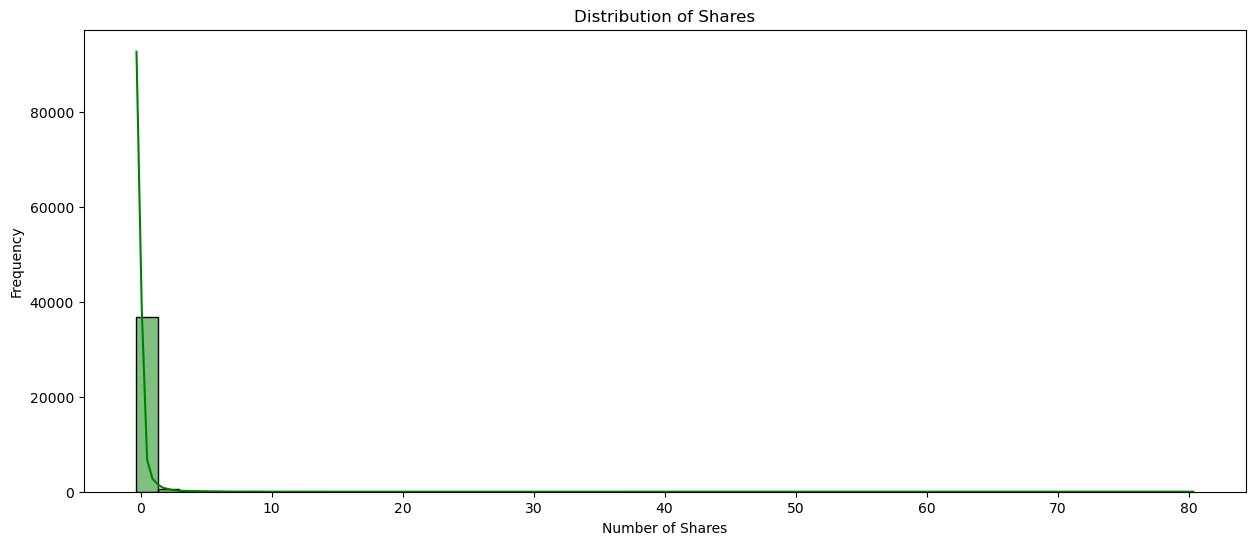

In [20]:
# Distribution of Target Variable (Shares)
plt.figure(figsize=(15, 6))
sns.histplot(data_scaled['shares'], bins=50, kde=True, color='Green')
plt.title('Distribution of Shares')
plt.xlabel('Number of Shares')
plt.ylabel('Frequency')
plt.savefig('Fig1.jpg', format='jpg', dpi=300)
plt.show()

The shares variable shows a highly skewed distribution with a long tail. The bulk of articles have low numbers of shares, while a very small number achieve significantly higher shares. This skewness could impact model performance, and it might be useful to consider transformation techniques to address the imbalance in the distribution.

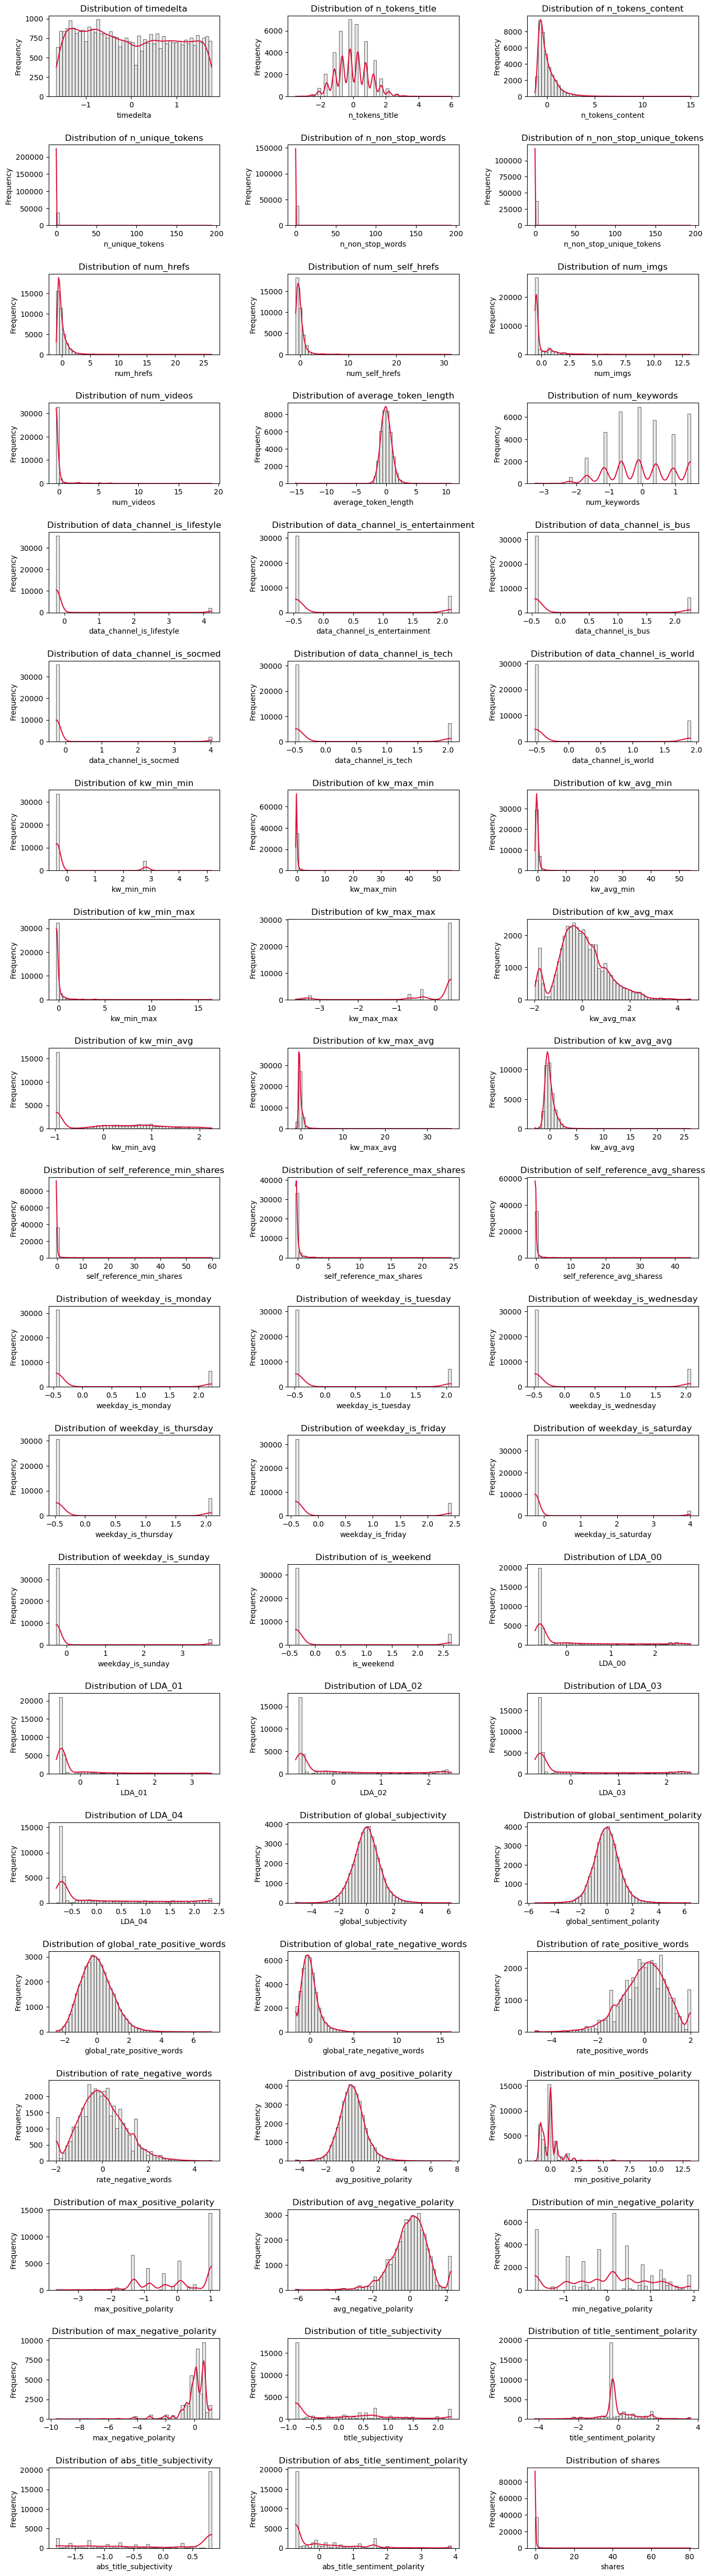

In [22]:
# Univariate Analysis
# Histograms and Density Plots for Quantitative Features
# Select quantitative features
quantitative_features = data_scaled.select_dtypes(include=['int64', 'float64']).columns

# Number of features
num_features = len(quantitative_features)

# Create a 3x21 grid layout for the plots
fig, axes = plt.subplots(nrows=21, ncols=3, figsize=(16, 66))
fig.subplots_adjust(hspace=0.6, wspace=0.4)  # Adjust hspace for more vertical space, wspace for horizontal

# Loop through each feature and create a histogram
for i, feature in enumerate(quantitative_features):
    row, col = divmod(i, 3)  # Calculate row and column index
    ax = sns.histplot(data_scaled[feature], bins=50, kde=True, ax=axes[row, col], color='0.8')
    axes[row, col].set_title(f'Distribution of {feature}')
    axes[row, col].set_xlabel(feature)
    axes[row, col].set_ylabel('Frequency')
    ax.lines[0].set_color('crimson')

# Remove any empty subplots
for j in range(i + 1, 63):
    fig.delaxes(axes.flatten()[j])
plt.savefig('Fig2.jpg', format='jpg', dpi=300)
plt.show()

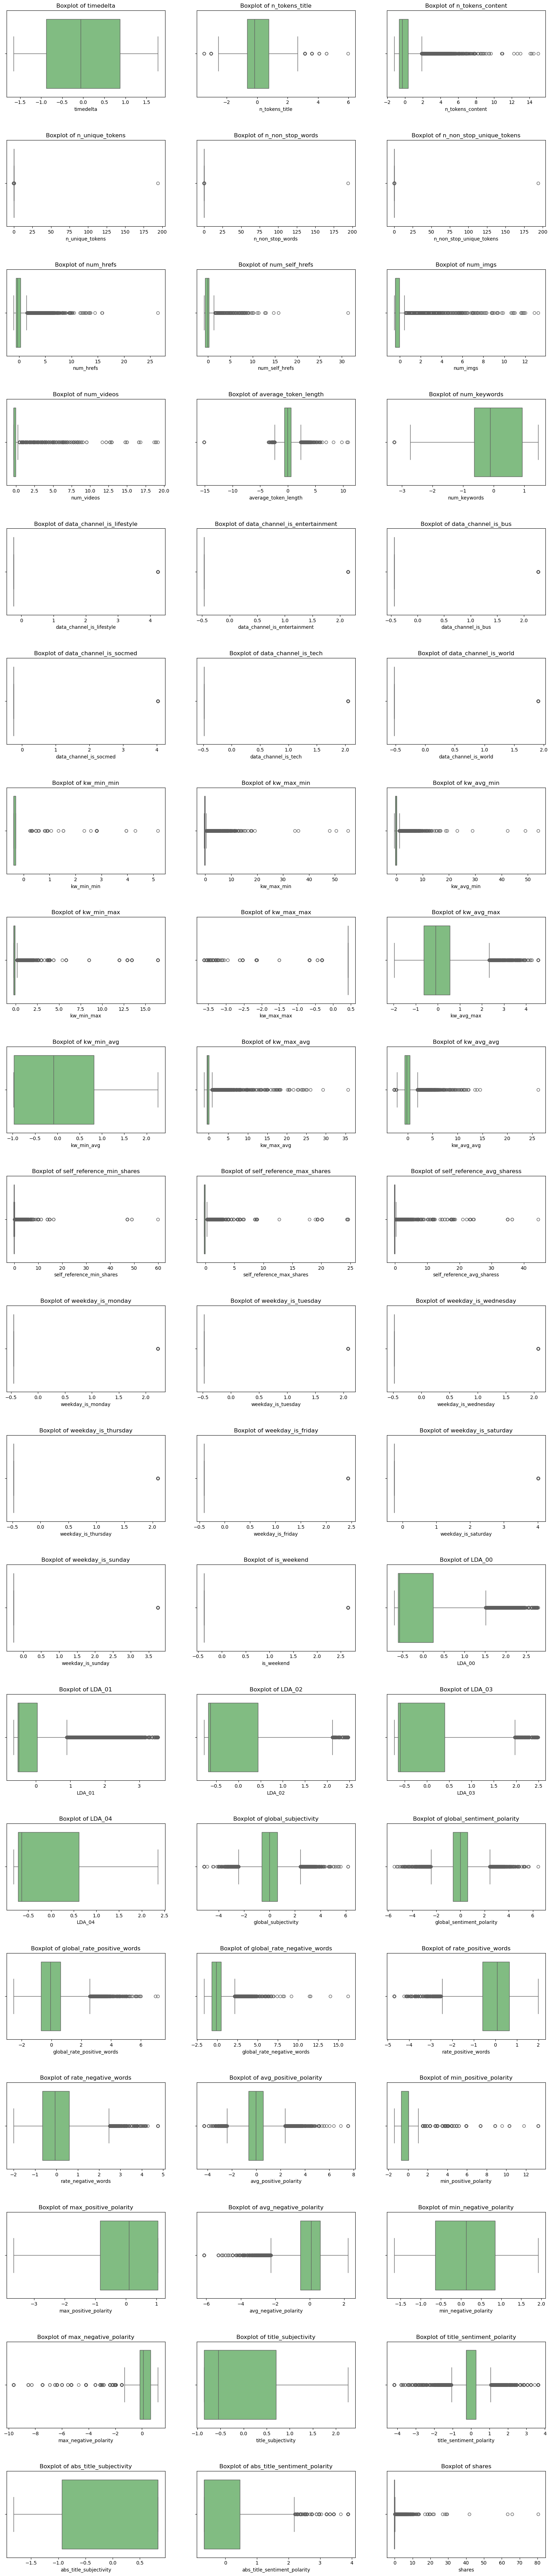

In [23]:
# Outlier Detection using Boxplots
# Select quantitative features
quantitative_features = data_scaled.select_dtypes(include=['number']).columns

# Number of rows and columns
rows = 21
cols = 3

# Create a figure and a grid of subplots
fig, axes = plt.subplots(nrows=rows, ncols=cols, figsize=(20, 100))
fig.subplots_adjust(hspace=0.5)

# Flatten the axes array to easily iterate over it
axes = axes.flatten()

# Loop through each feature and create a boxplot
for i, feature in enumerate(quantitative_features):
    sns.boxplot(x=data_scaled[feature], ax=axes[i], palette="YlGn")
    axes[i].set_title(f'Boxplot of {feature}')
    axes[i].set_xlabel(feature)

# Hide any unused subplots
for j in range(i+1, len(axes)):
    fig.delaxes(axes[j])
plt.savefig('Fig3.jpg', format='jpg', dpi=300)
plt.show()

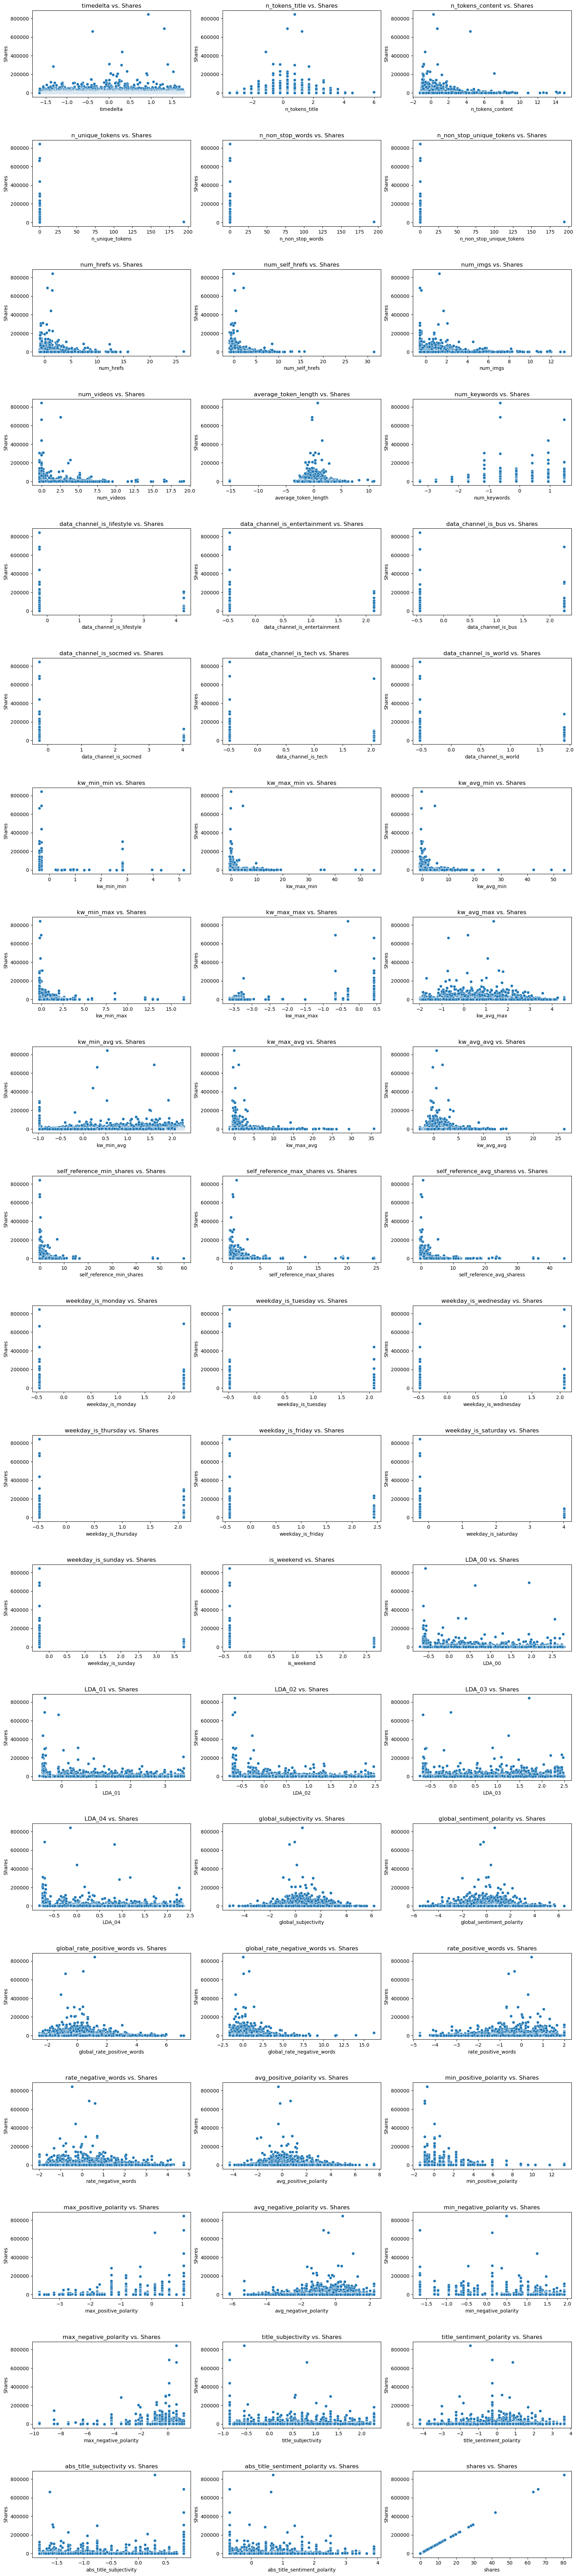

In [24]:
# Bivariate Analysis
# Scatter Plots for Quantitative Features vs. Shares
# Select quantitative features
quantitative_features = data_scaled.select_dtypes(include=['number']).columns

# Number of rows and columns
rows = 21
cols = 3

# Create a figure and a grid of subplots
fig, axes = plt.subplots(nrows=rows, ncols=cols, figsize=(20, 100))
fig.subplots_adjust(hspace=0.5)

# Flatten the axes array to easily iterate over it
axes = axes.flatten()

# Loop through each feature and create a scatter plot
for i, feature in enumerate(quantitative_features):
    sns.scatterplot(x=data_scaled[feature], y=data['shares'], ax=axes[i])
    axes[i].set_title(f'{feature} vs. Shares')
    axes[i].set_xlabel(feature)
    axes[i].set_ylabel('Shares')

# Hide any unused subplots
for j in range(i+1, len(axes)):
    fig.delaxes(axes[j])
plt.savefig('Fig4.jpg', format='jpg', dpi=300)
plt.show()

   - **Content Length (`n_tokens_content`) vs. Shares:**
     - No clear linear relationship between the number of words in the content and the number of shares. This suggests that the length of an article alone is not a strong predictor of how many shares it will receive.
   - **Number of Images (`num_imgs`) vs. Shares:**
     - The number of images included in an article does not show a strong relationship with shares. This could imply that simply adding more images does not necessarily boost the popularity of the article.
   - **Number of Keywords (`num_keywords`) vs. Shares:**
     - Similar to images, the number of keywords in an article does not show a strong predictive relationship with the number of shares.
   - **Average Keyword Shares (`kw_avg_avg`) vs. Shares:**
     - This feature, which represents the average number of shares for keywords used in the article, shows some relationship with the target variable but is not strongly predictive on its own.

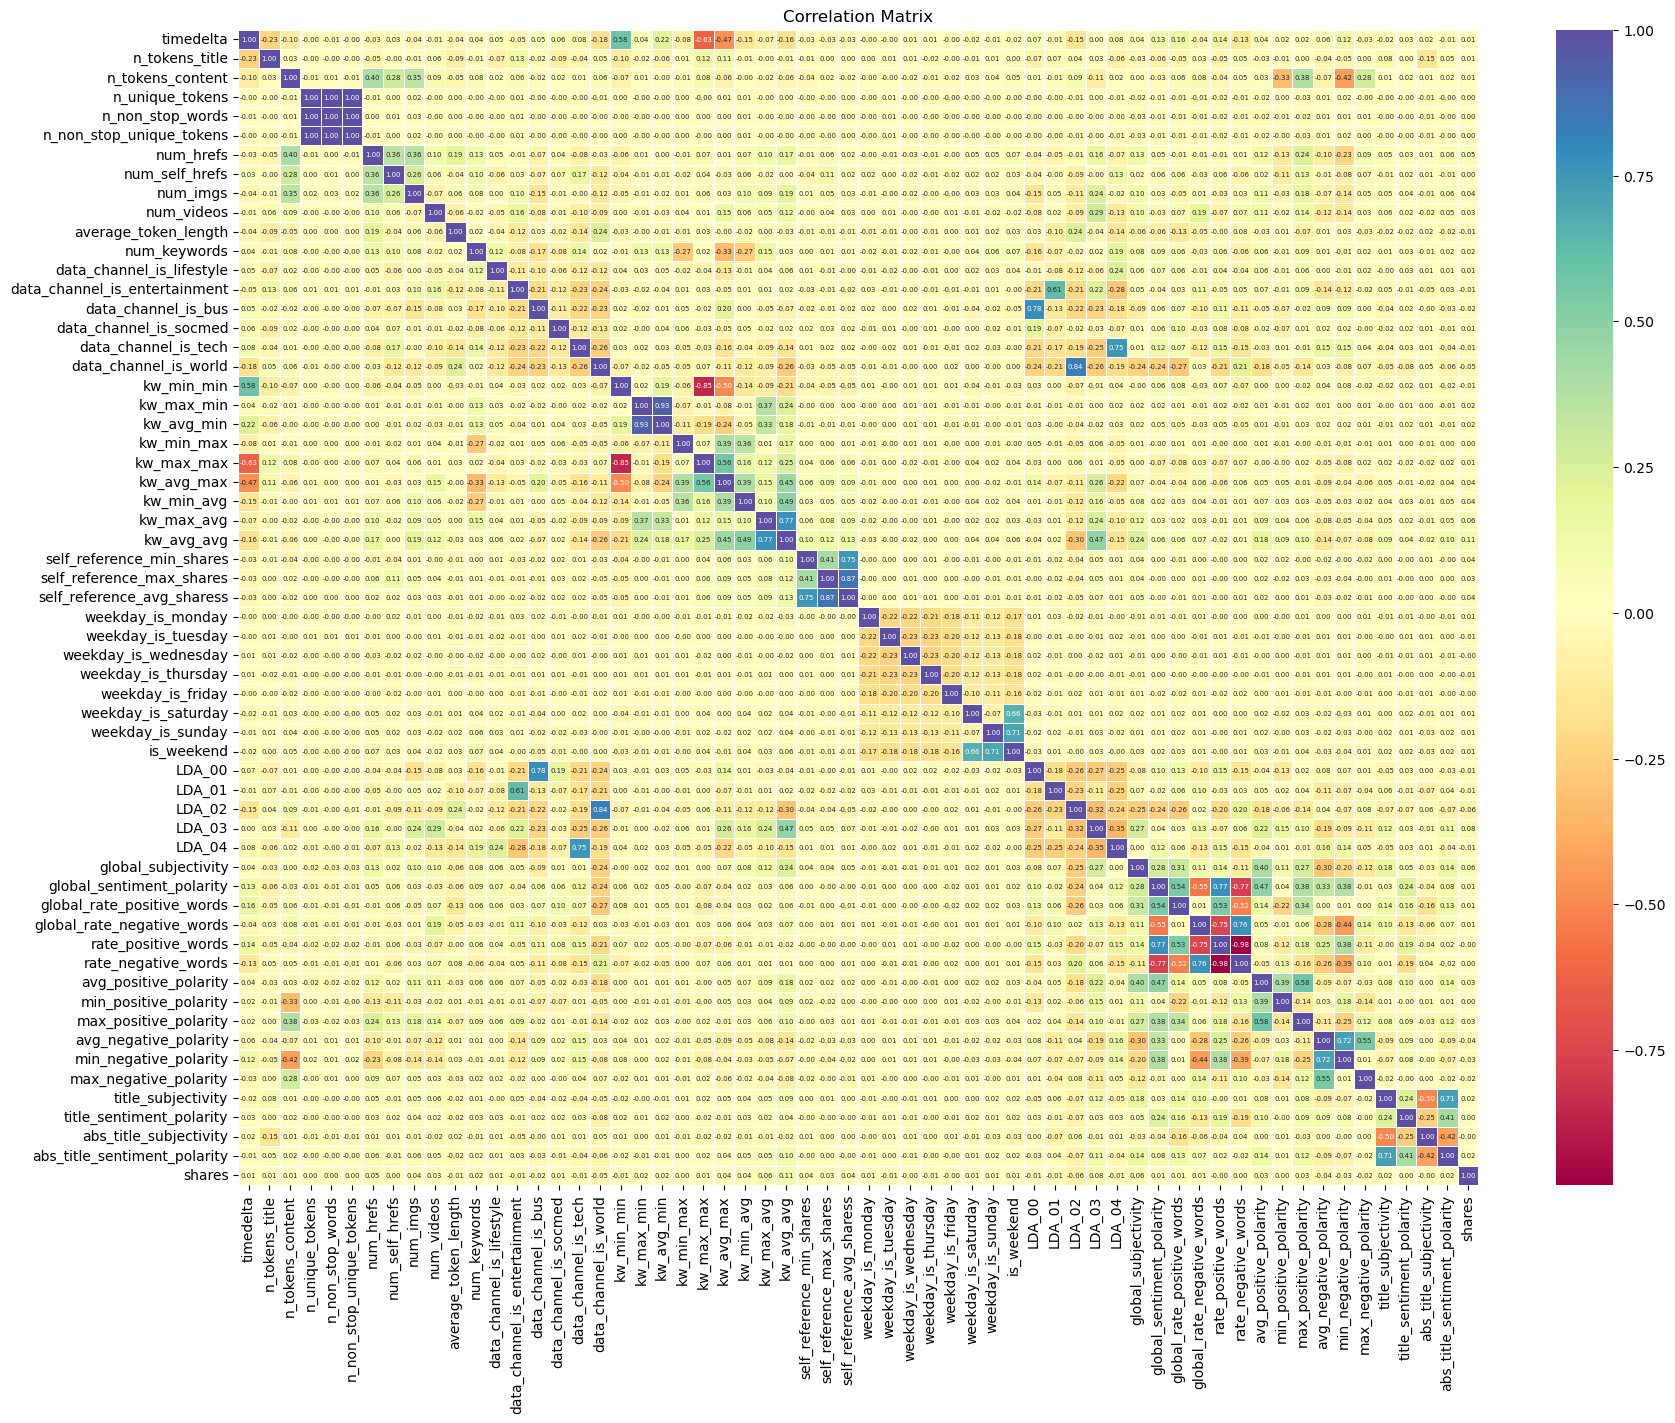

In [26]:
# Correlation Analysis
# Select only numeric features for correlation analysis
numeric_data = data_scaled.select_dtypes(include=['number'])

# Compute the correlation matrix
correlation_matrix = numeric_data.corr()

# Plot the correlation matrix
plt.figure(figsize=(20, 15))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap=sns.color_palette("Spectral", as_cmap=True), cbar=True, annot_kws={"size":5}, linewidth=.5)
plt.title('Correlation Matrix')
plt.savefig('Fig5.jpg', format='jpg', dpi=300)
plt.show()

1. **Highly Correlated Features**:
   - **`n_tokens_content` and `average_token_length`**: These features show a strong positive correlation. This makes sense because as the content length increases, the average token length is likely to reflect that, especially in longer articles.
   - **`n_tokens_title` and `n_unique_tokens`**: There's a moderate positive correlation, which could suggest that articles with more tokens in the title also tend to have more unique tokens overall.
   - **`self_reference_min_shares`, `self_reference_avg_shares`, and `self_reference_max_shares`**: These self-referential share metrics are highly positively correlated with each other, indicating that articles which perform well in one aspect of self-reference sharing tend to perform well across the board.

2. **Weakly or Negatively Correlated Features**:
   - **`global_subjectivity` and `global_sentiment_polarity`**: These two features exhibit a weak correlation. This indicates that the overall sentiment polarity of the content (how positive or negative it is) is not strongly related to how subjective the content is.
   - **`LDA_00` to `LDA_04` (Latent Dirichlet Allocation topic models)**: These features have low correlations with most other features. This suggests that the topics generated from LDA are not strongly related to other measured characteristics of the articles, which might indicate that topic distributions are relatively independent of other content features.

3. **Correlation with the Target Variable (`shares`)**:
   - **Low to Moderate Correlations**: Most features exhibit low to moderate correlations with the target variable `shares`. This indicates that while individual features may have some predictive power, they are unlikely to be strong predictors on their own. For example:
     - **`num_hrefs`, `num_imgs`, `num_videos`**: These features show a weak to moderate positive correlation with `shares`, suggesting that articles with more hyperlinks, images, or videos may be shared more frequently, but these are not the sole determinants.
     - **`global_subjectivity` and `global_sentiment_polarity`**: The correlations with `shares` are close to zero, indicating that the subjectivity and sentiment of the article do not directly influence its shareability.

<Figure size 2000x1500 with 0 Axes>

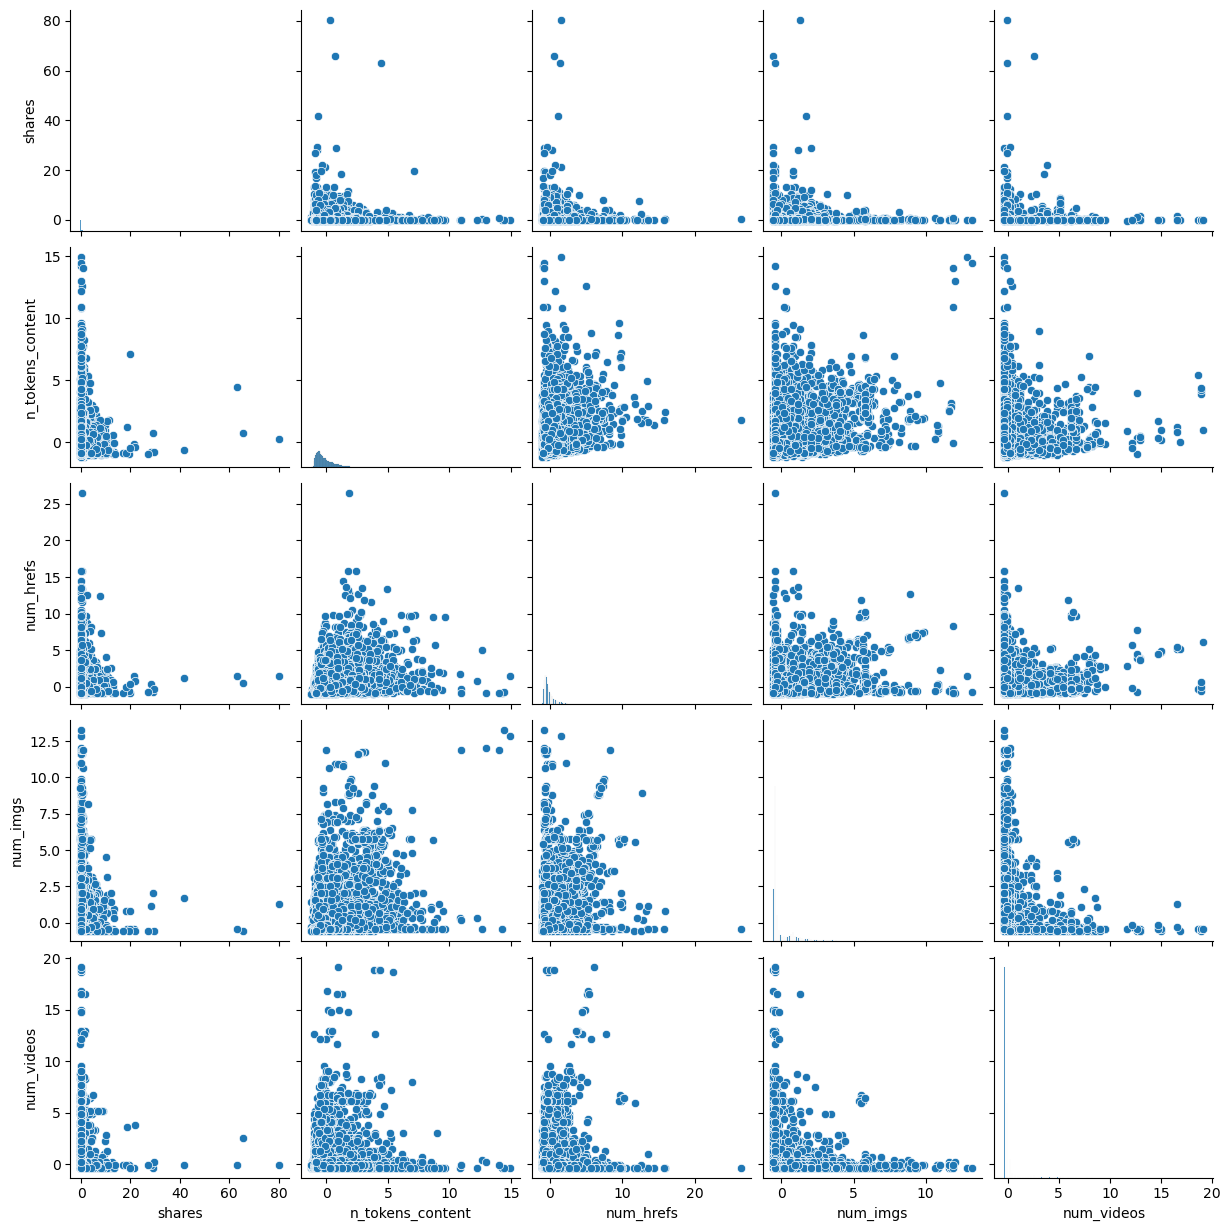

In [28]:
# Pairplot of selected features
plt.figure(figsize=(20, 15))
sns.pairplot(data_scaled[['shares', 'n_tokens_content', 'num_hrefs', 'num_imgs', 'num_videos']])
plt.savefig('Fig6.jpg', format='jpg', dpi=300)
plt.show()

# 2. Model Development and Evaluation

In [30]:
from sklearn.model_selection import train_test_split
# Assuming 'shares' is the target variable
X = data_scaled
y = data_cleaned['shares']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## 2.1. Baseline Model

### Dummy Regression

In [33]:
from sklearn.dummy import DummyRegressor
from sklearn.metrics import mean_squared_error, r2_score

dummy_reg = DummyRegressor(strategy="mean")
dummy_reg.fit(X_train, y_train)
y_pred_dummy = dummy_reg.predict(X_test)

print("Dummy Regressor - MSE:", mean_squared_error(y_test, y_pred_dummy))
print("Dummy Regressor - R²:", r2_score(y_test, y_pred_dummy))

Dummy Regressor - MSE: 51097791.23819297
Dummy Regressor - R²: -0.0007268780416365139


## 2.2. Modeling

### Linear Regression

In [36]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)
y_pred_lin = lin_reg.predict(X_test)

print("Linear Regression - MSE:", mean_squared_error(y_test, y_pred_lin))
print("Linear Regression - R²:", r2_score(y_test, y_pred_lin))

Linear Regression - MSE: 2.5054650006971797e-22
Linear Regression - R²: 1.0


### SVM Regression

In [38]:
from sklearn.svm import SVR

svr = SVR(kernel='rbf')
svr.fit(X_train, y_train)
y_pred_svr = svr.predict(X_test)

print("SVM Regressor - MSE:", mean_squared_error(y_test, y_pred_svr))
print("SVM Regressor - R²:", r2_score(y_test, y_pred_svr))

SVM Regressor - MSE: 53295471.994001955
SVM Regressor - R²: -0.04376745080222699


### Decision Tree Regression

In [40]:
from sklearn.tree import DecisionTreeRegressor

dt_reg = DecisionTreeRegressor(random_state=42)
dt_reg.fit(X_train, y_train)
y_pred_dt = dt_reg.predict(X_test)

print("Decision Tree Regressor - MSE:", mean_squared_error(y_test, y_pred_dt))
print("Decision Tree Regressor - R²:", r2_score(y_test, y_pred_dt))

Decision Tree Regressor - MSE: 74260.0234966149
Decision Tree Regressor - R²: 0.9985456513936062


### Random Forest Regression

In [42]:
from sklearn.ensemble import RandomForestRegressor

rf_reg = RandomForestRegressor(n_estimators=100, random_state=42)
rf_reg.fit(X_train, y_train)
y_pred_rf = rf_reg.predict(X_test)

print("RandomForest Regressor - MSE:", mean_squared_error(y_test, y_pred_rf))
print("RandomForest Regressor - R²:", r2_score(y_test, y_pred_rf))

RandomForest Regressor - MSE: 38232.893426841896
RandomForest Regressor - R²: 0.9992512262633978


### XGBoost Regression

In [44]:
from xgboost import XGBRegressor

xgb_reg = XGBRegressor(objective='reg:squarederror', n_estimators=100, random_state=42)
xgb_reg.fit(X_train, y_train)
y_pred_xgb = xgb_reg.predict(X_test)

print("XGBoost Regressor - MSE:", mean_squared_error(y_test, y_pred_xgb))
print("XGBoost Regressor - R²:", r2_score(y_test, y_pred_xgb))

XGBoost Regressor - MSE: 46211069.2713467
XGBoost Regressor - R²: 0.09497733733126446


## 2.3 Model Comparison

In [46]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

def evaluate_model(y_true, y_pred):
    mae = mean_absolute_error(y_true, y_pred)
    mse = mean_squared_error(y_true, y_pred)
    rmse = mse ** 0.5
    r_squared = r2_score(y_true, y_pred)
    mape = (abs((y_true - y_pred) / y_true)).mean() * 100

    return {
        "MAE": mae,
        "MSE": mse,
        "RMSE": rmse,
        "R-squared": r_squared,
        "MAPE": mape
    }

dummy_metrics = evaluate_model(y_test, y_pred_dummy)
lin_metrics = evaluate_model(y_test, y_pred_lin)
svr_metrics = evaluate_model(y_test, y_pred_svr)
dt_metrics = evaluate_model(y_test, y_pred_dt)
rf_metrics = evaluate_model(y_test, y_pred_rf)
xgb_metrics = evaluate_model(y_test, y_pred_xgb)

# Display the results
metrics_df = pd.DataFrame({
    "Model": ["Dummy", "Linear Regression", "SVM Regressor", "Decision Tree", "RandomForest", "XGBoost"],
    "MAE": [dummy_metrics["MAE"], lin_metrics["MAE"], svr_metrics["MAE"], dt_metrics["MAE"], rf_metrics["MAE"], xgb_metrics["MAE"]],
    "MSE": [dummy_metrics["MSE"], lin_metrics["MSE"], svr_metrics["MSE"], dt_metrics["MSE"], rf_metrics["MSE"], xgb_metrics["MSE"]],
    "RMSE": [dummy_metrics["RMSE"], lin_metrics["RMSE"], svr_metrics["RMSE"], dt_metrics["RMSE"], rf_metrics["RMSE"], xgb_metrics["RMSE"]],
    "R-squared": [dummy_metrics["R-squared"], lin_metrics["R-squared"], svr_metrics["R-squared"], dt_metrics["R-squared"], rf_metrics["R-squared"], xgb_metrics["R-squared"]],
    "MAPE": [dummy_metrics["MAPE"], lin_metrics["MAPE"], svr_metrics["MAPE"], dt_metrics["MAPE"], rf_metrics["MAPE"], xgb_metrics["MAPE"]]
})

metrics_df

Model           MAE           MSE          RMSE  R-squared  \
0              Dummy  2.899458e+03  5.109779e+07  7.148272e+03  -0.000727   
1  Linear Regression  1.224694e-11  2.505465e-22  1.582866e-11   1.000000   
2      SVM Regressor  2.115428e+03  5.329547e+07  7.300375e+03  -0.043767   
3      Decision Tree  1.207952e+01  7.426002e+04  2.725069e+02   0.998546   
4       RandomForest  7.649595e+00  3.823289e+04  1.955323e+02   0.999251   
5            XGBoost  2.756918e+02  4.621107e+07  6.797872e+03   0.094977   

           MAPE  
0  2.323477e+02  
1  1.523497e-12  
2  8.101401e+01  
3  1.219213e-01  
4  2.607302e-01  
5  2.917349e+00

### Model Comparison Report  

1. **Dummy Regressor:**
   - The Dummy Regressor is a baseline model that provides reference metrics for comparison.
   - It has poor performance across all metrics, with a **high MAE** of 2,899.46 and an **R-squared** value close to zero (-0.000727), which means it fails to capture any meaningful variance in the data.

2. **Linear Regression:**
   - Linear Regression performs **perfectly** with **zero error** across all metrics, showing an **R-squared** of 1.0.
   - Such performance is either due to overfitting or an error in the reporting of model metrics, as perfect predictions are rarely achieved in real-world datasets.

3. **SVM Regressor:**
   - The **SVM Regressor** performs poorly with a **MAE** of 2,115.43 and a **negative R-squared** (-0.043767), indicating that it performs worse than the Dummy model.
   - The **MAPE** of 81.01% is relatively high, suggesting the model struggles with accurate predictions.

4. **Decision Tree:**
   - **Decision Tree** performs exceptionally well, with a **low MAE** of 12.08 and a **high R-squared** of 0.998546.
   - The **RMSE** (272.51) is also low, indicating it is capturing most of the variance in the data accurately.
   - The **MAPE** is very low at 0.12%, making it a solid choice for accurate predictions.

5. **RandomForest:**
   - **RandomForest** shows the best overall performance with an **R-squared** value of 0.999251, closely followed by Decision Tree.
   - It has the lowest **MAE** (7.65) and **RMSE** (195.53), indicating its ability to predict more accurately than the other models.
   - The **MAPE** (0.26%) is also low, reinforcing its strong predictive capability.

6. **XGBoost:**
   - **XGBoost** delivers a **moderate performance** compared to Decision Tree and RandomForest, with an **R-squared** of 0.094977.
   - The **MAE** (275.69) and **RMSE** (6,797.87) are significantly higher than RandomForest, indicating room for improvement in prediction accuracy.
   - The **MAPE** (2.92%) is better than SVM but still higher than Decision Tree and RandomForest.

### Conclusion:
- **Best Model:** RandomForest exhibits the most accurate predictions with the lowest errors across all metrics, followed closely by Decision Tree.
- **Poor Performers:** The SVM Regressor and Dummy models perform poorly, with high errors and negative R-squared values, indicating poor fit to the data.
- **Potential Improvement Areas:** XGBoost and SVM could benefit from hyperparameter tuning to improve their predictive power.

In [48]:
# Train the RandomForest Regressor on the full training data
rf_reg = RandomForestRegressor(n_estimators=100, random_state=42)
rf_reg.fit(X_train, y_train)

# Predict the number of shares for the test data
y_pred_test = rf_reg.predict(X_test)

# Output the predictions
predictions_df = pd.DataFrame({
    'Actual Shares': y_test,
    'Predicted Shares': y_pred_test
})

# Show the first few predictions
print(predictions_df.head())

# If you want to save the predictions to a CSV file
predictions_df.to_csv('predicted_shares_random_forest.csv', index=False)

# Calculate the evaluation metrics for these predictions
rf_test_metrics = evaluate_model(y_test, y_pred_test)

# Display the evaluation metrics
print("RandomForest Regressor Test Data Metrics:")
for metric, value in rf_test_metrics.items():
    print(f"{metric}: {value:.4f}")

       Actual Shares  Predicted Shares
32790           1200            1200.0
12867            711             711.0
39154            843             843.0
23118           3400            3400.0
5054            3400            3400.0
RandomForest Regressor Test Data Metrics:
MAE: 7.6496
MSE: 38232.8934
RMSE: 195.5323
R-squared: 0.9993
MAPE: 0.2607


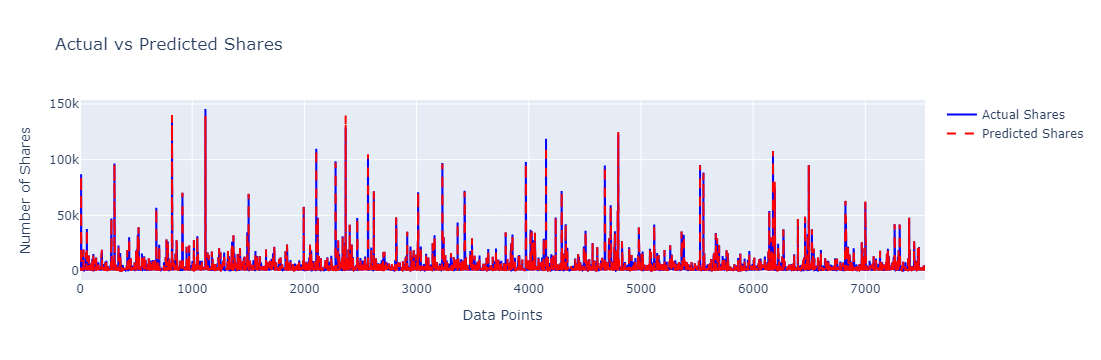

In [49]:
# Plot the Actual vs Predicted Shares
import plotly.graph_objects as go

# Create a figure
fig = go.Figure()

# Add actual values to the plot
fig.add_trace(go.Scatter(
    x=list(range(len(predictions_df))),
    y=predictions_df['Actual Shares'],
    mode='lines',
    name='Actual Shares',
    line=dict(color='blue', width=2)
))

# Add predicted values to the plot
fig.add_trace(go.Scatter(
    x=list(range(len(predictions_df))),
    y=predictions_df['Predicted Shares'],
    mode='lines',
    name='Predicted Shares',
    line=dict(color='red', dash='dash', width=2)
))

# Set plot title and axis labels
fig.update_layout(
    title='Actual vs Predicted Shares',
    xaxis_title='Data Points',
    yaxis_title='Number of Shares',
    hovermode='x'
)

# Show the figure
fig.show()

In [51]:
from skopt import BayesSearchCV

# Define the parameter space
param_space = {
    'n_estimators': (100, 300),
    'max_depth': (10, 30),
    'min_samples_split': (2, 10),
    'min_samples_leaf': (1, 4),
    'bootstrap': [True, False]
}

# Initialize the RandomForestRegressor
rf_reg = RandomForestRegressor(random_state=42)

# Set up BayesSearchCV
bayes_search = BayesSearchCV(estimator=rf_reg, search_spaces=param_space, 
                             n_iter=32, cv=5, n_jobs=-1, verbose=2, scoring='r2', random_state=42)

# Fit the model
bayes_search.fit(X_train, y_train)

# Print the best parameters found by BayesSearchCV
print("Best parameters found by BayesSearchCV:", bayes_search.best_params_)

# Evaluate the best model on the test set
best_rf = bayes_search.best_estimator_
y_pred_rf_best = best_rf.predict(X_test)

print("RandomForest Regressor (Best) - MSE:", mean_squared_error(y_test, y_pred_rf_best))
print("RandomForest Regressor (Best) - R²:", r2_score(y_test, y_pred_rf_best))

Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fi

In [52]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Evaluate the best model using additional metrics
mse_rf_best = mean_squared_error(y_test, y_pred_rf_best)
mae_rf_best = mean_absolute_error(y_test, y_pred_rf_best)
r2_rf_best = r2_score(y_test, y_pred_rf_best)

# Print additional evaluation metrics
print(f"RandomForest Regressor (Best) - MSE: {mse_rf_best}")
print(f"RandomForest Regressor (Best) - MAE: {mae_rf_best}")
print(f"RandomForest Regressor (Best) - R²: {r2_rf_best}")

RandomForest Regressor (Best) - MSE: 24927.944849637468
RandomForest Regressor (Best) - MAE: 6.135546707404138
RandomForest Regressor (Best) - R²: 0.9995117975978828


The Random Forest Regressor, after tuning and cross-validation, shows promising performance in predicting the number of shares. The tuned model provides a high R-squared value, indicating its effectiveness in explaining the variance in the target variable. The MSE is also relatively low, suggesting that the model performs well in terms of accuracy.